In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
data = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
data["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
data.corr()["Transported"]

Age            -0.075026
RoomService    -0.244611
FoodCourt       0.046566
ShoppingMall    0.010141
Spa            -0.221131
VRDeck         -0.207075
Transported     1.000000
Name: Transported, dtype: float64

In [7]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
data["Age"].mean()

28.82793046746535

In [9]:
data["Age"].median()

27.0

In [10]:
df2 = data.drop(["Spa","HomePlanet","RoomService","FoodCourt","ShoppingMall"],axis=1)
df2.head()

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,VRDeck,Name,Transported
0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,Maham Ofracculy,False
1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,44.0,Juanna Vines,True
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,49.0,Altark Susent,False
3,0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,193.0,Solam Susent,False
4,0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,2.0,Willy Santantines,True


In [11]:
df2.isnull().sum()

PassengerId      0
CryoSleep      217
Cabin          199
Destination    182
Age            179
VIP            203
VRDeck         188
Name           200
Transported      0
dtype: int64

In [12]:
df2["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [13]:
#Max is False so Fill null value to False
df2["CryoSleep"].fillna(False,inplace=True)

In [14]:
len(df2["Cabin"].value_counts())

6560

In [15]:
#null leagth is less so remove it
df2.dropna(subset=["Cabin",] ,inplace=True)

In [16]:
df2["Destination"].value_counts()

TRAPPIST-1e      5788
55 Cancri e      1750
PSO J318.5-22     778
Name: Destination, dtype: int64

In [17]:
df2["Destination"].fillna(method="ffill",inplace=True)

In [18]:
df2["VIP"].value_counts()

False    8104
True      193
Name: VIP, dtype: int64

In [19]:
#Max is False so Fill null value to False
df2["VIP"].fillna("True",inplace=True)

In [20]:
df2["VRDeck"].isnull().sum()
df2.dropna(subset=["Name","VRDeck"] ,inplace=True)

In [21]:
df2["Age"].median() # middale Value

27.0

In [22]:
df2["Age"].mode() # most repeted value

0    24.0
dtype: float64

In [23]:
df2["Age"].mean() # average value

28.861457153642885

In [24]:
df2["Age"].fillna(df2["Age"].mean(),inplace=True)

In [25]:
df2.isnull().sum()

PassengerId    0
CryoSleep      0
Cabin          0
Destination    0
Age            0
VIP            0
VRDeck         0
Name           0
Transported    0
dtype: int64

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8116 entries, 0 to 8692
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  8116 non-null   object 
 1   CryoSleep    8116 non-null   bool   
 2   Cabin        8116 non-null   object 
 3   Destination  8116 non-null   object 
 4   Age          8116 non-null   float64
 5   VIP          8116 non-null   object 
 6   VRDeck       8116 non-null   float64
 7   Name         8116 non-null   object 
 8   Transported  8116 non-null   bool   
dtypes: bool(2), float64(2), object(5)
memory usage: 523.1+ KB


In [27]:
df2["VIP"].value_counts()

False    7735
True      195
True      186
Name: VIP, dtype: int64

In [28]:
df2["VIP"].replace({False:0,"True":1,True:1},inplace=True)

In [29]:
df2["Destination"].value_counts()
df2["Destination"].replace({"TRAPPIST-1e":0,"55 Cancri e":1,"PSO J318.5-22":2},inplace=True)

In [30]:
df2["Cabin"] = df2["Cabin"].apply(lambda x : x.split("/")[2])
df2["Cabin"].head()
df2["Cabin"].replace({"P":0,"S":1},inplace=True)

In [31]:
df2["CryoSleep"].value_counts()
df2["CryoSleep"].replace({False:0,True:1},inplace=True)

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8116 entries, 0 to 8692
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  8116 non-null   object 
 1   CryoSleep    8116 non-null   int64  
 2   Cabin        8116 non-null   int64  
 3   Destination  8116 non-null   int64  
 4   Age          8116 non-null   float64
 5   VIP          8116 non-null   int64  
 6   VRDeck       8116 non-null   float64
 7   Name         8116 non-null   object 
 8   Transported  8116 non-null   bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 578.6+ KB


In [33]:
df2.corr()["Transported"]

CryoSleep      0.460592
Cabin          0.104440
Destination    0.074736
Age           -0.078522
VIP           -0.025251
VRDeck        -0.210417
Transported    1.000000
Name: Transported, dtype: float64

In [34]:
import seaborn as sns

<AxesSubplot:xlabel='CryoSleep', ylabel='Transported'>

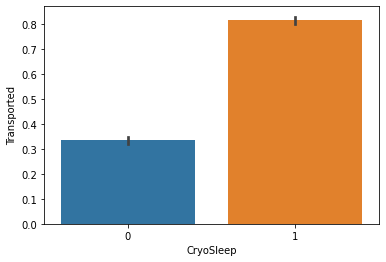

In [35]:
sns.barplot(x=df2["CryoSleep"], y=df2["Transported"])

<AxesSubplot:xlabel='Cabin', ylabel='Transported'>

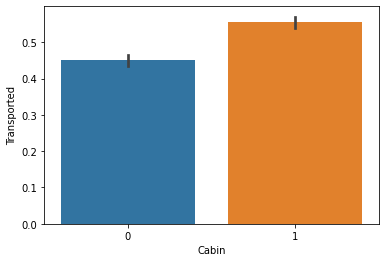

In [36]:
sns.barplot(x=df2["Cabin"], y=df2["Transported"])

In [37]:
x = df2.drop(["Transported","PassengerId","Name"],axis=1)
y = df2["Transported"]
print(x.shape, y.shape)

(8116, 6) (8116,)


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.3)

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [40]:
lr.fit(x_train,y_train)

LogisticRegression()

In [41]:
lr.score(x_test,y_test)

0.7071868583162217

In [42]:
lr.score(x_train,y_train)

0.7236402041894032

In [43]:
y_pred = lr.predict(x_test)
print(y_pred[:5] , y_test.head())

[ True False False False False] 5274     True
4974    False
2580    False
723     False
8139     True
Name: Transported, dtype: bool


In [44]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=400,)
regr.fit(x_train,y_train)
print(regr.score(x_train,y_train))

0.601360570334907


In [45]:
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor(random_state=200,max_depth=20, )
dr.fit(x_train,y_train)
print(dr.score(x_train,y_train))
y_pred = dr.predict(x_test)
print(y_pred[:5] , y_test.head())

0.6253313151798086
[0.75       0.33333333 0.375      0.68421053 0.        ] 5274     True
4974    False
2580    False
723     False
8139     True
Name: Transported, dtype: bool
